In [35]:
# imports 
import mne
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
%matplotlib inline

In [4]:
%gui qt

Impedance example
<div>
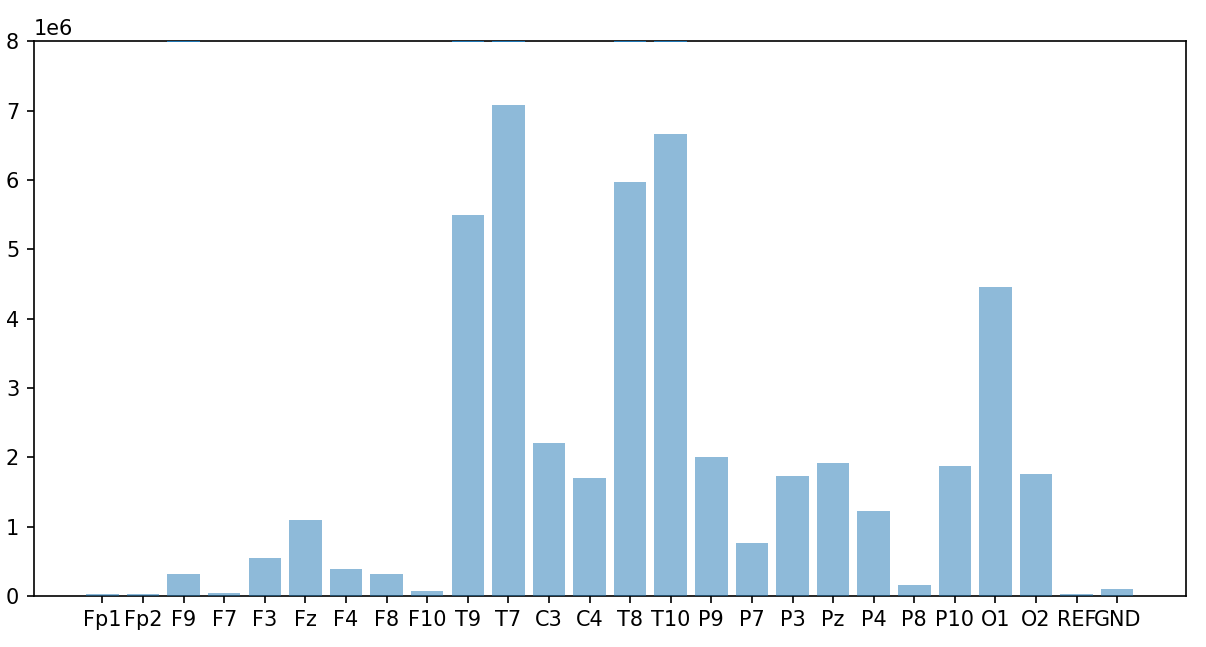
</div>

### Load Data

In [7]:
fdir = 'Experiment/output_data/'
fname = 'sub-1_ses-sleepy.fif'
raw = mne.io.read_raw_fif(fdir+fname)

# Details über die Elektroden und den Aplifier


Opening raw data file Experiment/output_data/sub-1_ses-sleepy.fif...
Isotrak not found
    Range : 0 ... 14868 =      0.000 ...    29.736 secs
Ready.


C:\Users\gross\AppData\Local\Temp\ipykernel_18644\2976534055.py:3: RuntimeWarning: This filename (Experiment/output_data/sub-1_ses-sleepy.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fdir+fname)


Effective window size : 4.096 (s)


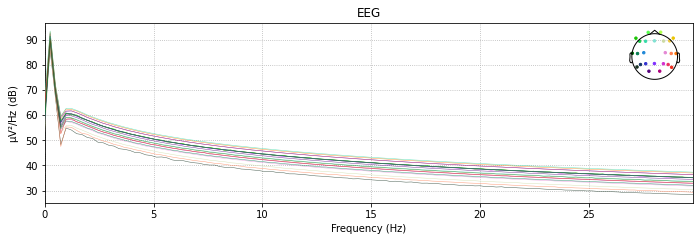

In [26]:
#raw.plot(scalings=1e-1)
raw.plot_psd(0,30)
#raw.plot(duration=3, n_channels=5, scalings=1e-1)
plt.show()

In [21]:
# check if standard montag is set
if raw.info['dig'] is not None:
    print("Montage is set.")
else:
    print("Montage is not set.")

Montage is set.


In [20]:
# it is not so I use the standard one:
montage = mne.channels.make_standard_montage('standard_1020')
raw.info.set_montage(montage)

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F9, F7, F3, Fz, F4, F8, F10, T9, T7, C3, C4, T8, T10, ...
 chs: 24 EEG
 custom_ref_applied: False
 dig: 27 items (3 Cardinal, 24 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 24
 projs: []
 sfreq: 500.0 Hz
>

(24,)


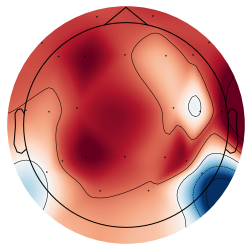

(<matplotlib.image.AxesImage at 0x1733dcb5820>,
 <matplotlib.contour.QuadContourSet at 0x1733dcb5ac0>)

In [38]:
# Plot topomap for a specific time point (e.g., 100 ms)
time_point = 0.1  # In seconds
average = np.mean(raw.get_data(),1)
print(average.shape)
mne.viz.plot_topomap(average, raw.info)

## Load Data (example data)

In [5]:
sample_data_folder = mne.datasets.sample.data_path()

## Preprocessing

In [ ]:
# filtering 

# ICA component analysis 


## Analysis
Das Ziel ist es den Energieverbrauch der beiden Datensätze zu vergleichen. 
